In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Replace with your actual filename
txt_file_path = "../data/MachineLearningRating_v3.txt"
csv_file_path = "../data/MachineLearningRating_v3.csv"

In [3]:
# Load the .txt file using the pipe delimiter
df = pd.read_csv(txt_file_path, delimiter='|')
# Save as .csv
df.to_csv(csv_file_path, index=False)
print("File converted successfully and saved as:", csv_file_path)

C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\23994556.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_file_path, delimiter='|')


File converted successfully and saved as: ../data/MachineLearningRating_v3.csv


In [4]:
#load csv file
df = pd.read_csv(csv_file_path)
# Display the first few rows of the DataFrame
print("DataFrame loaded successfully. Here are the first few rows:")

C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\1738757301.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


DataFrame loaded successfully. Here are the first few rows:


In [5]:
#check for missing values and print the count decreasingly
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
Cylinders                      552
bodytype                       552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
cubiccapacity                  552
CapitalOutstanding               2
dtype: int64


In [6]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [7]:
# Total number of rows
total_rows = len(df)
# Calculate missing count and percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows) * 100

In [8]:
# Combine into a DataFrame for easy inspection
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Display only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print(missing_summary)

                         Missing Count   Missing %
NumberOfVehiclesInFleet        1000098  100.000000
CrossBorder                     999400   99.930207
CustomValueEstimate             779642   77.956560
Rebuilt                         641901   64.183810
Converted                       641901   64.183810
WrittenOff                      641901   64.183810
NewVehicle                      153295   15.327998
Bank                            145961   14.594670
AccountType                      40232    4.022806
Gender                            9536    0.953507
MaritalStatus                     8259    0.825819
VehicleType                        552    0.055195
make                               552    0.055195
mmcode                             552    0.055195
Model                              552    0.055195
Cylinders                          552    0.055195
bodytype                           552    0.055195
kilowatts                          552    0.055195
NumberOfDoors                  

In [9]:
#code to drop columns with more than 80% missing values
# Filter columns with >80% missing
cols_to_drop = missing_percent[missing_percent > 80].index
# Drop those columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True)
# Optional: print dropped columns for verification
print("Dropped columns (missing > 80%):")
print(cols_to_drop)

Dropped columns (missing > 80%):
Index(['CrossBorder', 'NumberOfVehiclesInFleet'], dtype='object')


In [10]:
##Imputation Strategy  Numeric	Fill with median	fillna(median)  and Categorical/Text	Fill with mode or 'Unknown'	fillna(mode) 

In [11]:
# --- STEP 1: Separate columns by data type
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [12]:
# --- STEP 2: Impute numeric columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\55254169.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\55254169.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [13]:
# --- STEP 3: Impute categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\1455074569.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [14]:
# --- Optional: Verify no missing values remain
print("Remaining missing values:")
print(df.isnull().sum().sort_values(ascending=False).head())

Remaining missing values:
UnderwrittenCoverID    0
PolicyID               0
TransactionMonth       0
IsVATRegistered        0
Citizenship            0
dtype: int64


In [15]:
#save the cleaned DataFrame to a new CSV file
cleaned_csv_file_path = "../data/MachineLearningRating_v3_cleaned.csv"
df.to_csv(cleaned_csv_file_path, index=False)
print("Cleaned DataFrame saved successfully as:", cleaned_csv_file_path)
# --- STEP 4: Visualize missing data

Cleaned DataFrame saved successfully as: ../data/MachineLearningRating_v3_cleaned.csv


In [16]:
#load cleaned data
df= pd.read_csv("../data/MachineLearningRating_v3_cleaned.csv")


C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\645044029.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("../data/MachineLearningRating_v3_cleaned.csv")


In [17]:
# STEP 5: Confirm all missing values are handled
remaining_missing = df.isnull().sum().sort_values(ascending=False)
remaining_missing = remaining_missing[remaining_missing > 0]
# Output the top of the cleaned DataFrame and any remaining missing values (should be none)
df.head(), remaining_missing, df

(   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 0               145249     12827  2015-03-01 00:00:00             True   
 1               145249     12827  2015-05-01 00:00:00             True   
 2               145249     12827  2015-07-01 00:00:00             True   
 3               145255     12827  2015-05-01 00:00:00             True   
 4               145255     12827  2015-07-01 00:00:00             True   
 
   Citizenship          LegalType Title Language                 Bank  \
 0              Close Corporation    Mr  English  First National Bank   
 1              Close Corporation    Mr  English  First National Bank   
 2              Close Corporation    Mr  English  First National Bank   
 3              Close Corporation    Mr  English  First National Bank   
 4              Close Corporation    Mr  English  First National Bank   
 
        AccountType  ...                    ExcessSelected CoverCategory  \
 0  Current account  ...        

In [26]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

C:\Users\ayish\AppData\Local\Temp\ipykernel_14984\3376805668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])


In [27]:
#Calculate Loss Ratio
## Avoid divide-by-zero issues
df = df[(df['TotalPremium'] != 0) & (~df['TotalPremium'].isnull())]

In [28]:
# Add Loss Ratio column
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

In [29]:
# Overall average Loss Ratio
overall_loss_ratio = df['LossRatio'].mean()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")

Overall Loss Ratio: 0.35


In [30]:
#Loss Ratio by Province, VehicleType, and Gender
#Calculate and Print Average Loss Ratios
# Loss Ratio by Province
province_loss = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)
print("Average Loss Ratio by Province:")
print(province_loss)


Average Loss Ratio by Province:
Province
Gauteng          0.428927
Mpumalanga       0.392698
Limpopo          0.348712
Western Cape     0.341810
North West       0.285348
KwaZulu-Natal    0.265328
Eastern Cape     0.235636
Northern Cape    0.203831
Free State       0.106209
Name: LossRatio, dtype: float64


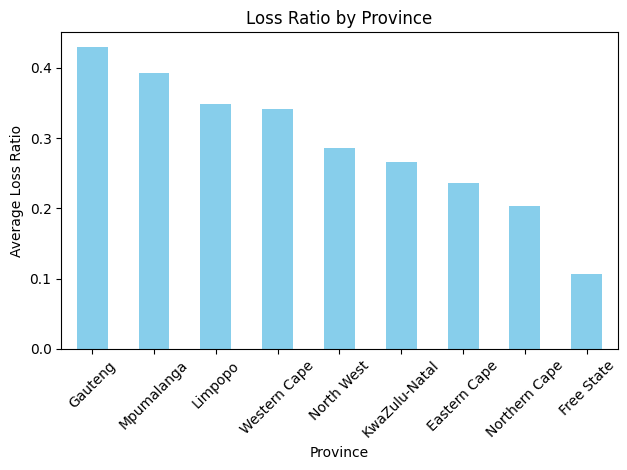

In [31]:
# Province
province_loss.plot(kind='bar', title='Loss Ratio by Province', color='skyblue')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Loss Ratio by VehicleType
vehicle_type_loss = df.groupby("VehicleType")["LossRatio"].mean().sort_values(ascending=False)
print("\nAverage Loss Ratio by Vehicle Type:")
print(vehicle_type_loss)


Average Loss Ratio by Vehicle Type:
VehicleType
Heavy Commercial     0.793617
Light Commercial     0.543917
Medium Commercial    0.493386
Passenger Vehicle    0.337869
Bus                  0.000000
Name: LossRatio, dtype: float64


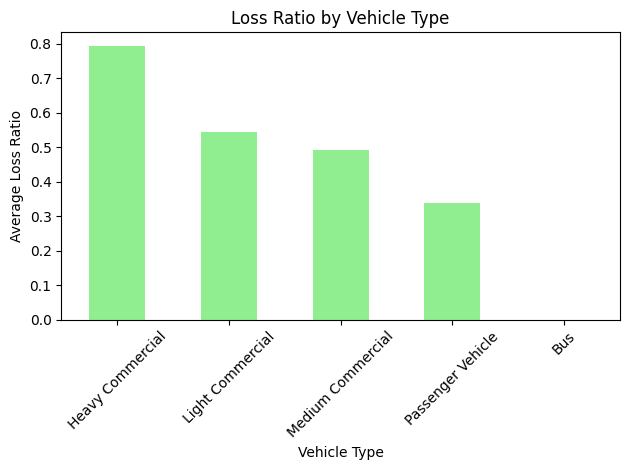

In [33]:
# VehicleType
vehicle_type_loss.plot(kind='bar', title='Loss Ratio by Vehicle Type', color='lightgreen')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Loss Ratio by Gender
gender_loss = df.groupby("Gender")["LossRatio"].mean().sort_values(ascending=False)
print("\nAverage Loss Ratio by Gender:")
print(gender_loss)


Average Loss Ratio by Gender:
Gender
Female           0.491979
Male             0.353258
Not specified    0.349134
Name: LossRatio, dtype: float64


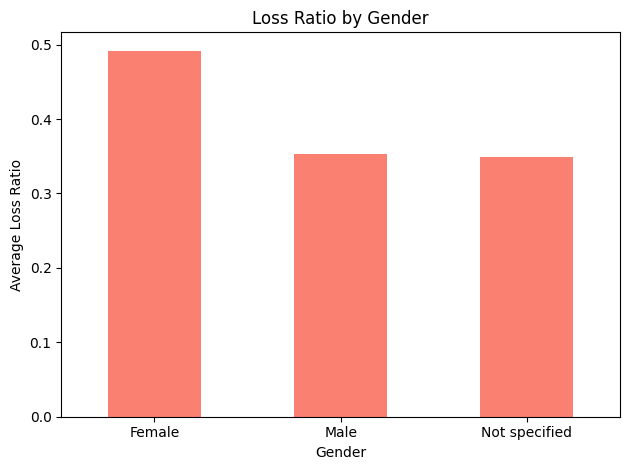

In [35]:
# Gender
gender_loss.plot(kind='bar', title='Loss Ratio by Gender', color='salmon')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# Province
province_loss = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)
print("🔹 Average Loss Ratio by Province:\n", province_loss)

# VehicleType
vehicle_type_loss = df.groupby("VehicleType")["LossRatio"].mean().sort_values(ascending=False)
print("\n🔹 Average Loss Ratio by VehicleType:\n", vehicle_type_loss)

# Gender
gender_loss = df.groupby("Gender")["LossRatio"].mean().sort_values(ascending=False)
print("\n🔹 Average Loss Ratio by Gender:\n", gender_loss)

🔹 Average Loss Ratio by Province:
 Province
Gauteng          0.428927
Mpumalanga       0.392698
Limpopo          0.348712
Western Cape     0.341810
North West       0.285348
KwaZulu-Natal    0.265328
Eastern Cape     0.235636
Northern Cape    0.203831
Free State       0.106209
Name: LossRatio, dtype: float64

🔹 Average Loss Ratio by VehicleType:
 VehicleType
Heavy Commercial     0.793617
Light Commercial     0.543917
Medium Commercial    0.493386
Passenger Vehicle    0.337869
Bus                  0.000000
Name: LossRatio, dtype: float64

🔹 Average Loss Ratio by Gender:
 Gender
Female           0.491979
Male             0.353258
Not specified    0.349134
Name: LossRatio, dtype: float64


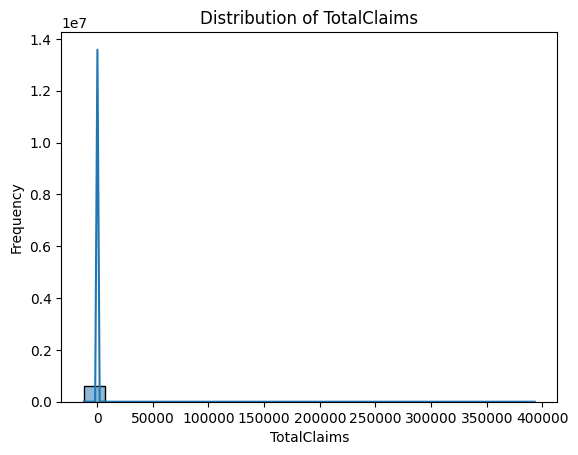

In [36]:
#Distributions and Outliers in TotalClaims and CustomValueEstimate
#A. Histogram and Boxplot for TotalClaims
# Distribution
sns.histplot(df['TotalClaims'].dropna(), kde=True)
plt.title("Distribution of TotalClaims")
plt.xlabel("TotalClaims")
plt.ylabel("Frequency")
plt.show()

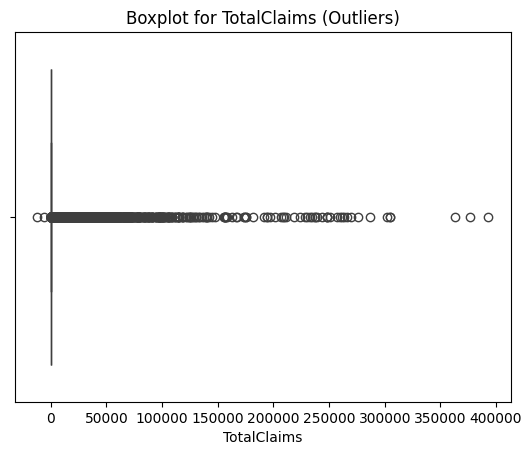

In [37]:
# Outliers
sns.boxplot(x=df['TotalClaims'])
plt.title("Boxplot for TotalClaims (Outliers)")
plt.show()

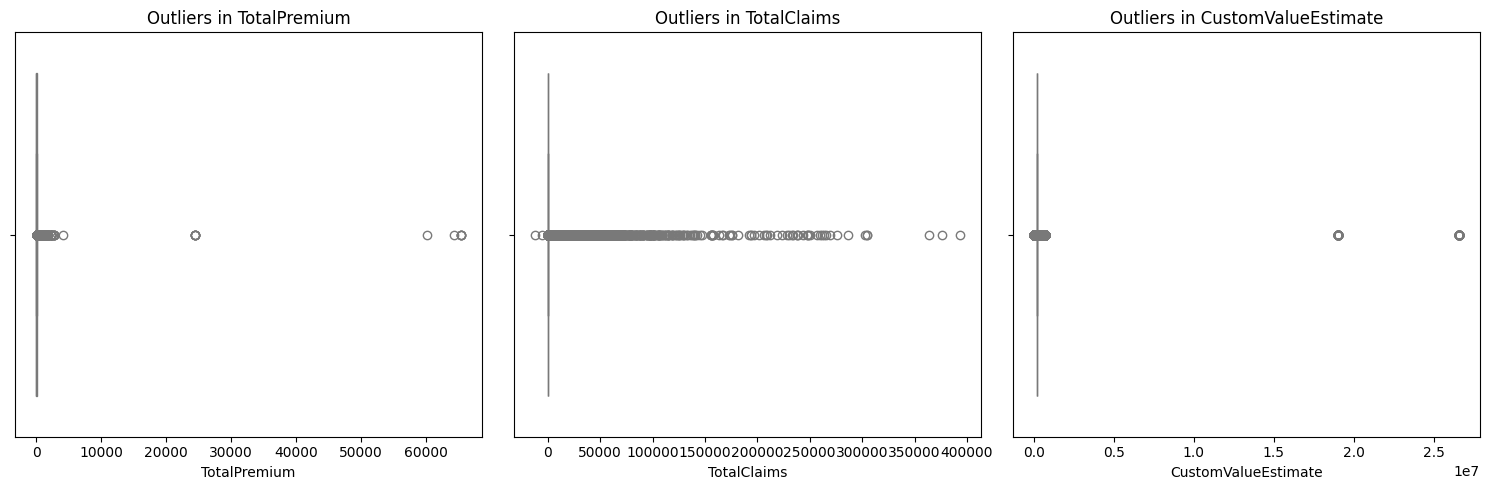

In [55]:
#Box Plots for TotalPremium, TotalClaims, and CustomValueEstimate
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Outliers in {col}")
    plt.tight_layout()

plt.show()

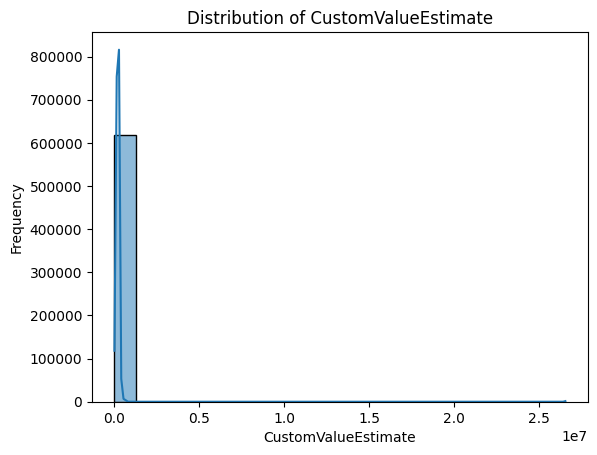

In [38]:
#Histogram and Boxplot for CustomValueEstimate
# Distribution
sns.histplot(df['CustomValueEstimate'].dropna(), kde=True)
plt.title("Distribution of CustomValueEstimate")
plt.xlabel("CustomValueEstimate")
plt.ylabel("Frequency")
plt.show()

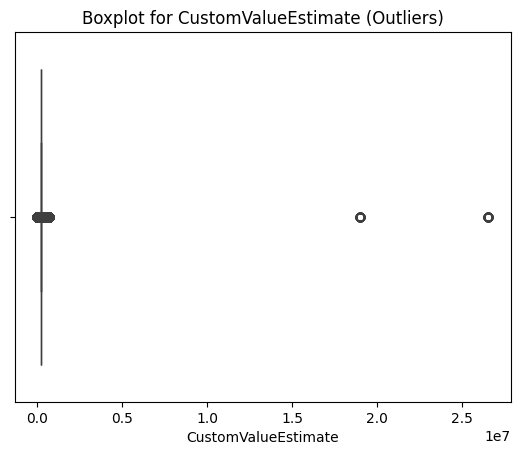

In [39]:
# Outliers
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Boxplot for CustomValueEstimate (Outliers)")
plt.show()

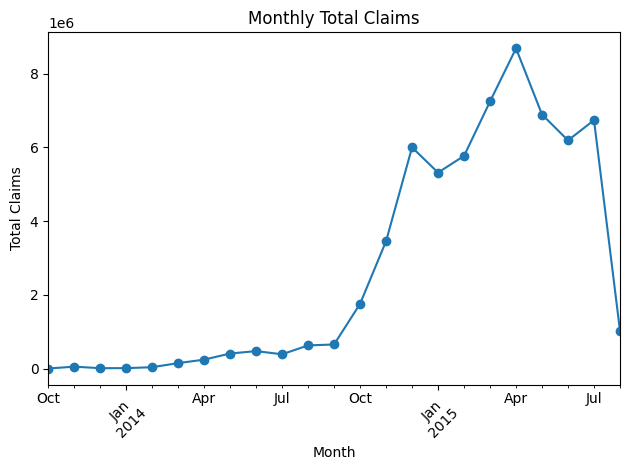

In [ ]:
#Q2: Are There Temporal Trends Over the 18-Month Period?
#A.  Monthly Total Claims
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
monthly_claims.plot(kind='line', marker='o', title='Monthly Total Claims')
plt.ylabel("Total Claims")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


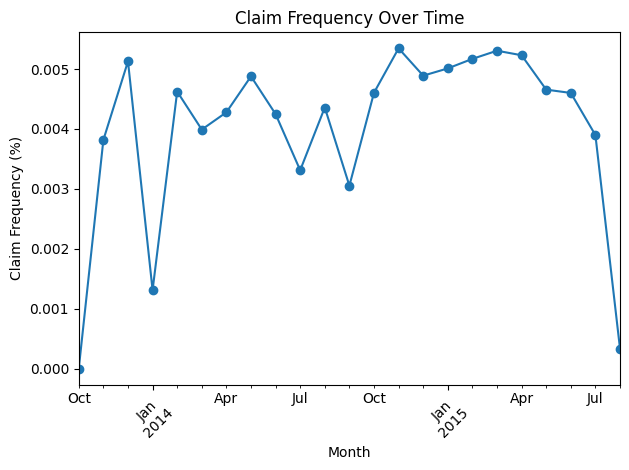

In [41]:
#B Monthly Claim Frequency
df['Claimed'] = df['TotalClaims'] > 0  # Boolean: True if claim occurred
claim_frequency = df.groupby(df['TransactionMonth'].dt.to_period('M'))['Claimed'].mean()
claim_frequency.plot(kind='line', marker='o', title='Claim Frequency Over Time')
plt.ylabel("Claim Frequency (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


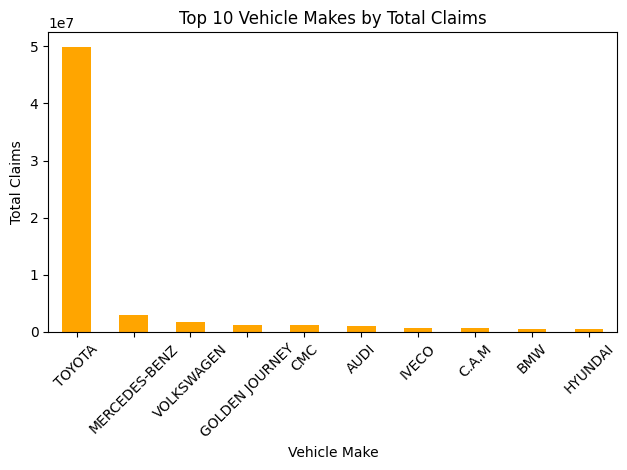

In [44]:
#Which Vehicle Makes and Models Have Highest/Lowest Claim Amounts?
#A.Top 10 Makes with Highest Claim Amount
df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top 10 Vehicle Makes by Total Claims", color='orange')
plt.ylabel("Total Claims")
plt.xlabel("Vehicle Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



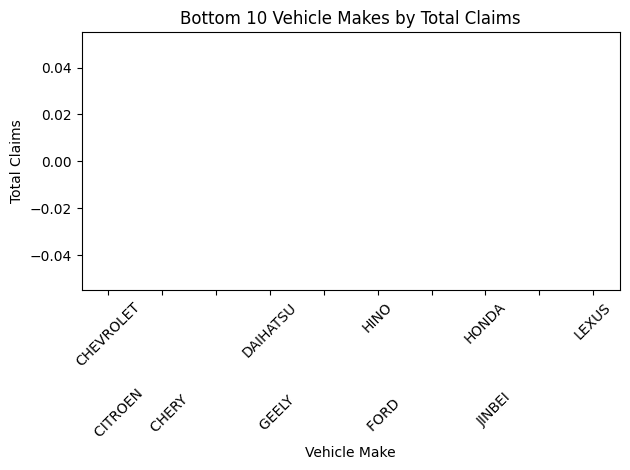

In [45]:
#B  Bottom 10 Makes with Lowest Claim Amount
df.groupby('make')['TotalClaims'].sum().sort_values().head(10).plot(kind='bar', title="Bottom 10 Vehicle Makes by Total Claims", color='green')
plt.ylabel("Total Claims")
plt.xlabel("Vehicle Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


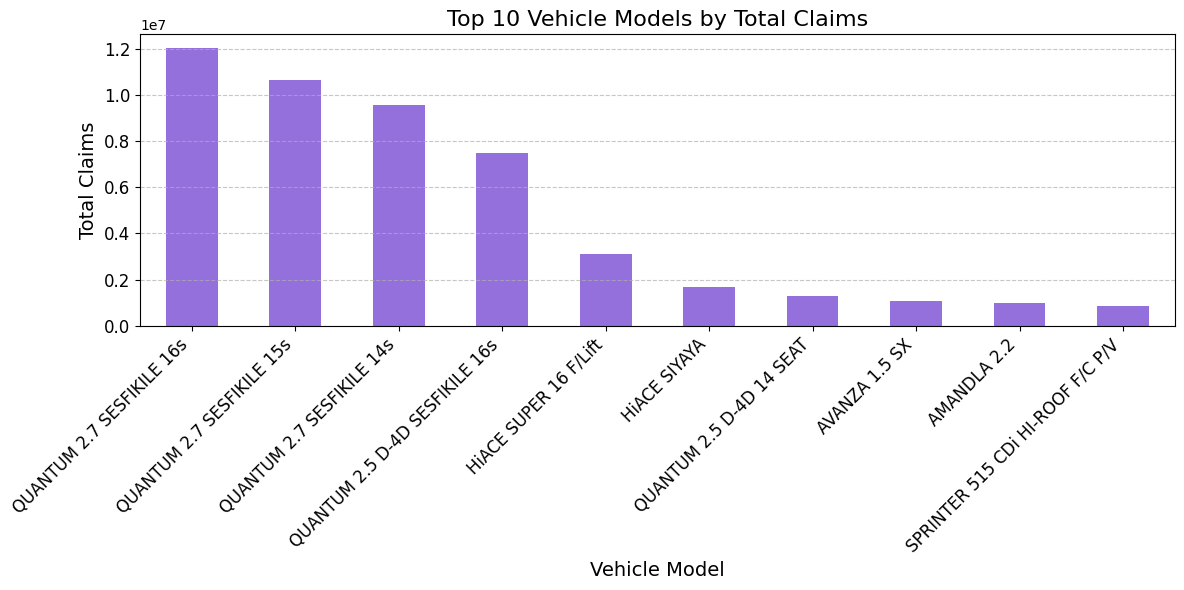

In [ ]:
# #C op 10 Models with Highest Claim Amount
top_models = df.groupby("Model")["TotalClaims"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))  # Wider figure
top_models.plot(kind='bar', color='mediumpurple')

# Titles and labels
plt.title('Top 10 Vehicle Models by Total Claims', fontsize=16)
plt.xlabel('Vehicle Model', fontsize=14)
plt.ylabel('Total Claims', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [48]:
#Top & Bottom 10 Vehicle Makes by TotalClaims interms of number
# Top 10 Makes
top_makes = df.groupby("make")["TotalClaims"].sum().sort_values(ascending=False).head(10)
print("🔹 Top 10 Vehicle Makes by Total Claims:\n", top_makes)

# Bottom 10 Makes (remove missing/blank makes)
bottom_makes = df[df['make'].notna()]
bottom_makes = bottom_makes.groupby("make")["TotalClaims"].sum().sort_values().head(10)
print("\n🔹 Bottom 10 Vehicle Makes by Total Claims:\n", bottom_makes)

🔹 Top 10 Vehicle Makes by Total Claims:
 make
TOYOTA            4.994967e+07
MERCEDES-BENZ     2.896924e+06
VOLKSWAGEN        1.663697e+06
GOLDEN JOURNEY    1.246583e+06
CMC               1.224566e+06
AUDI              1.018710e+06
IVECO             7.486609e+05
C.A.M             6.402556e+05
BMW               4.809722e+05
HYUNDAI           4.533079e+05
Name: TotalClaims, dtype: float64

🔹 Bottom 10 Vehicle Makes by Total Claims:
 make
CHEVROLET                              0.0
CITROEN                                0.0
CHERY                                  0.0
DAIHATSU                               0.0
GEELY                                  0.0
HINO                                   0.0
FORD                                   0.0
HONDA                                  0.0
JINBEI                                 0.0
LEXUS                                  0.0
Name: TotalClaims, dtype: float64


In [49]:
# Top 10 Vehicle Models by TotalClaims
top_models = df.groupby("Model")["TotalClaims"].sum().sort_values(ascending=False).head(10)
print("🔹 Top 10 Vehicle Models by Total Claims:\n", top_models)

🔹 Top 10 Vehicle Models by Total Claims:
 Model
QUANTUM 2.7 SESFIKILE 16s           1.201927e+07
QUANTUM 2.7 SESFIKILE 15s           1.066102e+07
QUANTUM 2.7 SESFIKILE 14s           9.555408e+06
QUANTUM 2.5 D-4D SESFIKILE 16s      7.475438e+06
HiACE SUPER 16 F/Lift               3.123633e+06
HiACE SIYAYA                        1.680251e+06
QUANTUM 2.5 D-4D 14 SEAT            1.293880e+06
AVANZA 1.5 SX                       1.085399e+06
AMANDLA 2.2                         1.006957e+06
SPRINTER 515 CDi HI-ROOF F/C P/V    8.808441e+05
Name: TotalClaims, dtype: float64


In [51]:
# Bivariate/Multivariate Analysis
#df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['Month'] = df['TransactionMonth'].dt.to_period('M')

In [ ]:
 #Group and Aggregate by ZipCode and Month
monthly_zip = df.groupby(['PostalCode', 'Month'])[['TotalPremium', 'TotalClaims']].sum().reset_index()


🔹 Avg Premium by Province:
 Province
KwaZulu-Natal    118.286470
Eastern Cape     108.677905
Western Cape     101.388071
Gauteng           99.903115
Mpumalanga        89.577486
Free State        87.889960
Northern Cape     86.894887
Limpopo           85.364235
North West        83.414160
Name: TotalPremium, dtype: float64


<Axes: title={'center': 'Average Total Premium by Province'}, xlabel='Province'>

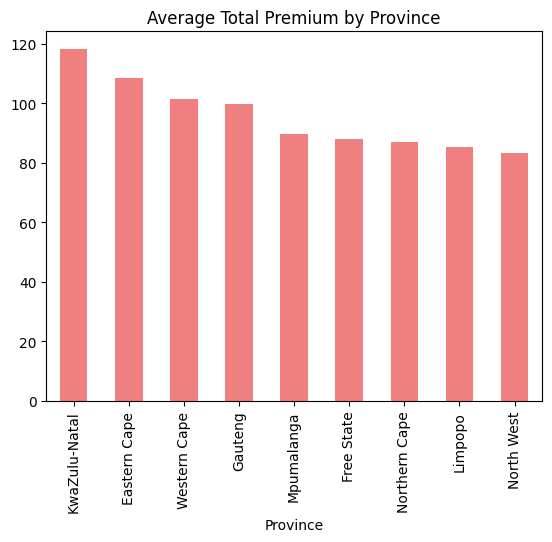

In [59]:
# Trends Over Geography   Compare insurance behavior across provinces (or zip codes)
#A.  Total Premium by Province
province_premium = df.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
print("🔹 Avg Premium by Province:\n", province_premium)
# Plotting Total Premium by Province
province_premium.plot(kind='bar', title='Average Total Premium by Province', color='lightcoral')

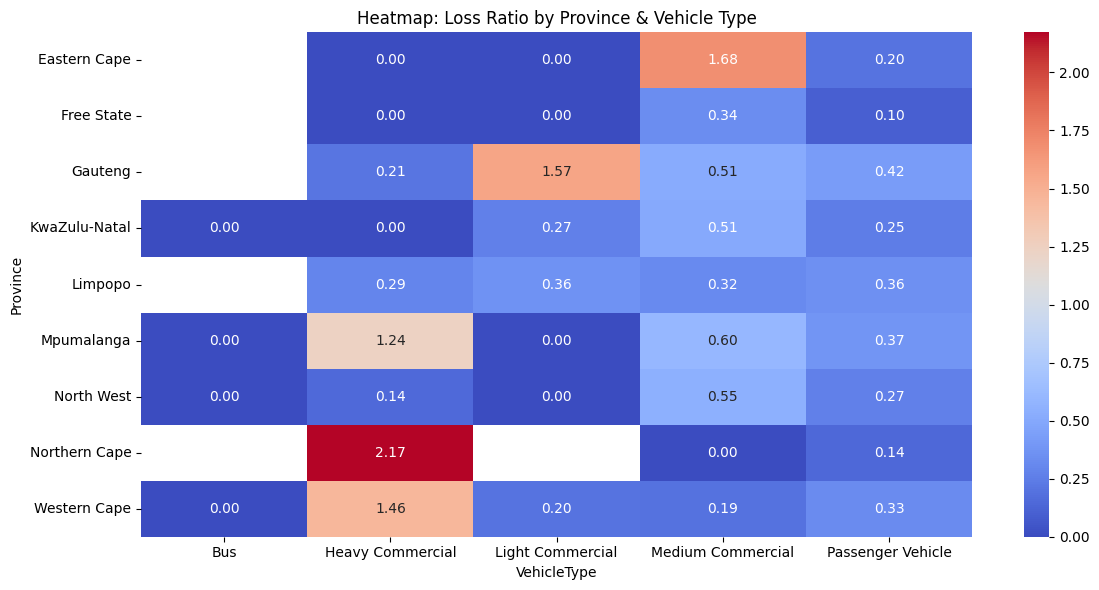

In [ ]:
# Heatmap of Loss Ratio by Province and VehicleType
pivot = df.pivot_table(values='LossRatio', index='Province', columns='VehicleType', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Loss Ratio by Province & Vehicle Type")
plt.tight_layout()
plt.show()



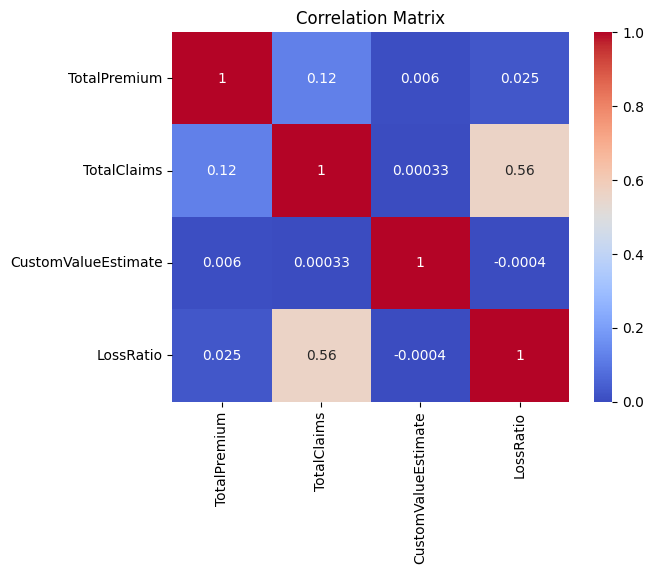

In [67]:
numeric_df = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']]
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()